# **Course Project 2**

**Name** : Ishita Rathod\
**ID**   : 202101516

## **Exploratory Data Analysis and Data Preprocessing:**

In [2]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
pd.set_option('display.max_columns', None)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

There are total 24 columns excluding index.

In [5]:
df.shape

(991346, 24)

Now, I have displayed the datatypes of various features. \
In given Dataset, Some **categorical (Nominal) features** are already encoded such as urine_protein, SMK_stat_type_cd. So they are also attributes with datatype 'Object' along with 'sex' and 'DRK_YN"\
Moreover, 'height' and 'weight' can be represented in float datatype, but in this dataset they are present in interval of 5. For example value of 'weight' feature is from the list {25,30,35,...,140} 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [7]:
categorical_cols = [col for col in df if df[col].dtype == 'object']
categorical_cols

['sex', 'DRK_YN']

Again, as mentioned above there are 2 more categorical features which are already encoded.

Now we will use the describe() function which provides basic statistics about the numeric columns in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [8]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


## **Boxplots :**

Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.



*   Minimum: Q1-1.5*IQR
*   1st quartile (Q1): 25th percentile
*   Median:50th percentile
*   3rd quartile(Q3):75th percentile
*   Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile\). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.


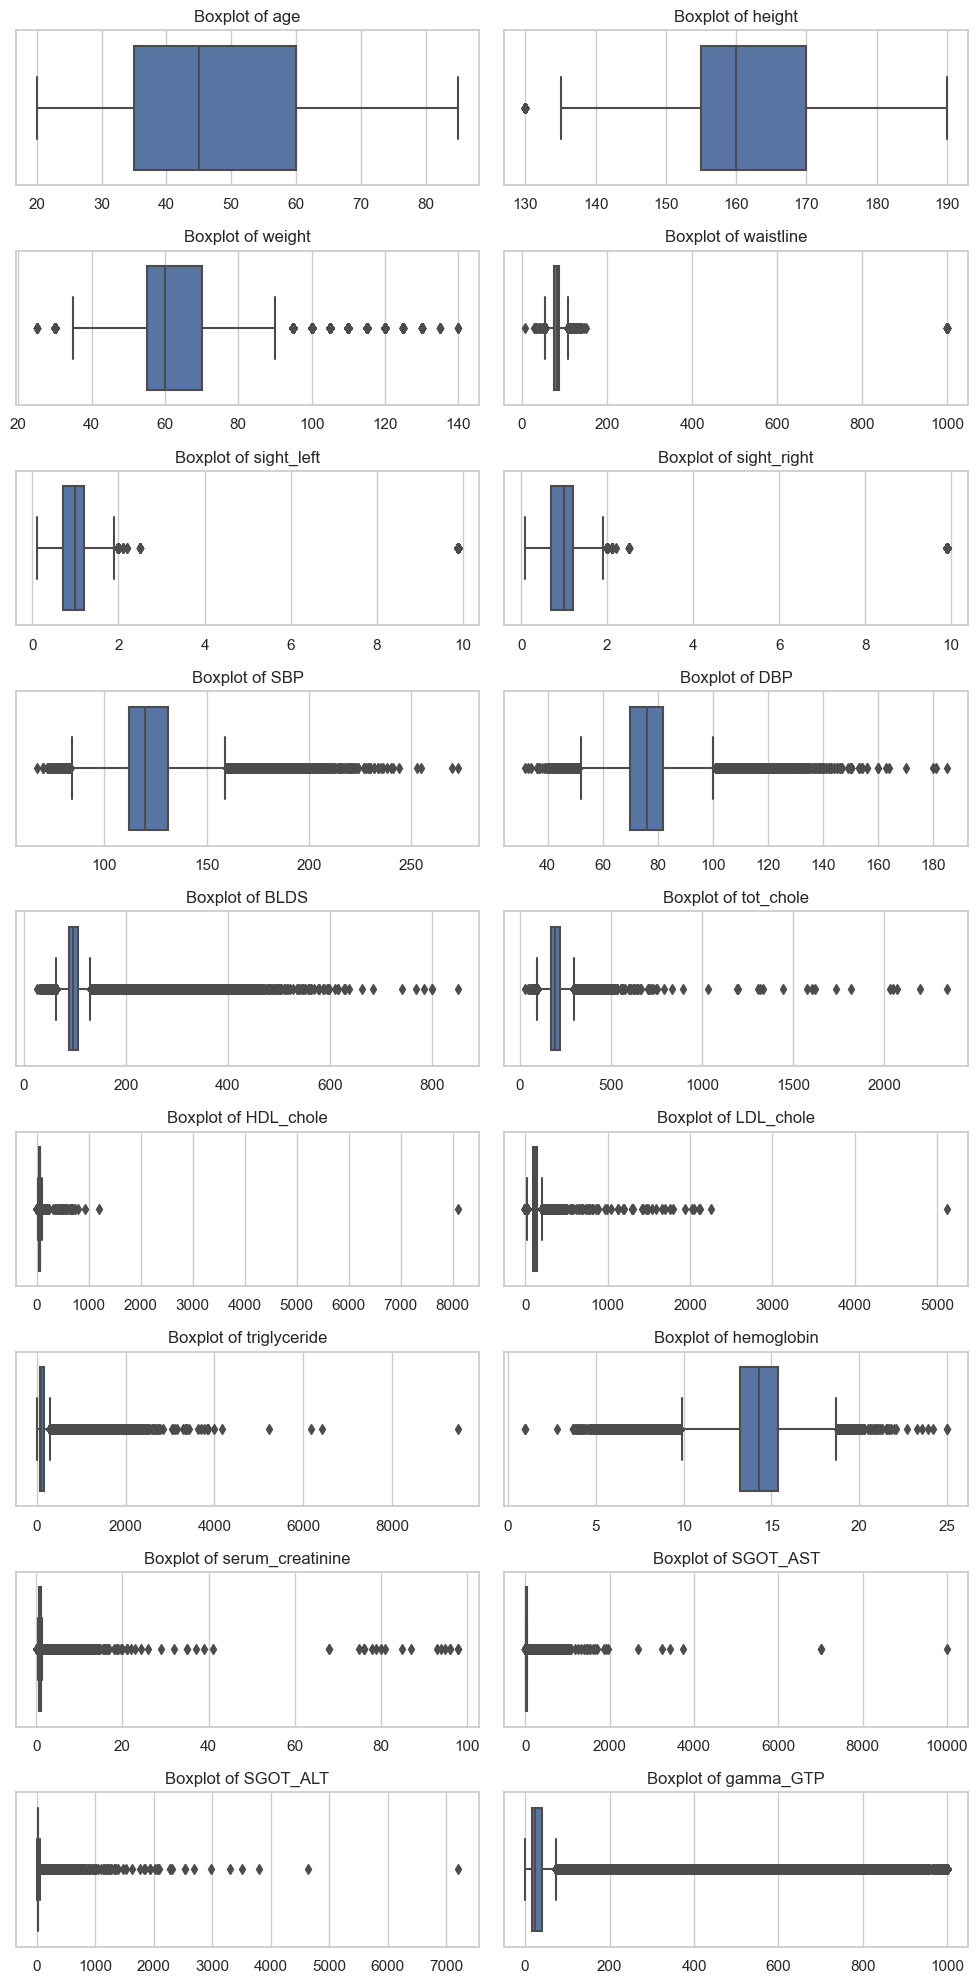

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(9, 2, figsize=(10, 20))
axes = axes.flatten()

# List of numeric columns 
numeric_columns = ['age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP']

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

From above boxplots, we can see that some features such as age, height, weight are evenly distributed and have less number of outliers. Some other features have more number of outliers. \
So, I have calulated the percenrage of outliers for each numerical coluumns to get the idea of outliers.

In [10]:
def calculate_outliers_percentage(df, columns, threshold=1.5):
    results = []

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Count outliers
        outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        outliers_percentage = (outliers_count / len(df.index)) * 100

        results.append((column, outliers_percentage))

    return results

outliers_results = calculate_outliers_percentage(df, numeric_columns)

print('Percentage of outliers :')
for feature, percentage in outliers_results:
    print(f"{feature}: {percentage:.2f}%")


Percentage of outliers :
age: 0.00%
height: 0.01%
weight: 1.94%
waistline: 0.45%
sight_left: 1.17%
sight_right: 1.06%
SBP: 1.60%
DBP: 1.32%
BLDS: 6.48%
tot_chole: 1.14%
HDL_chole: 1.40%
LDL_chole: 1.02%
triglyceride: 5.46%
hemoglobin: 0.98%
serum_creatinine: 0.81%
SGOT_AST: 6.82%
SGOT_ALT: 7.36%
gamma_GTP: 9.50%


### **Pie-charts :**

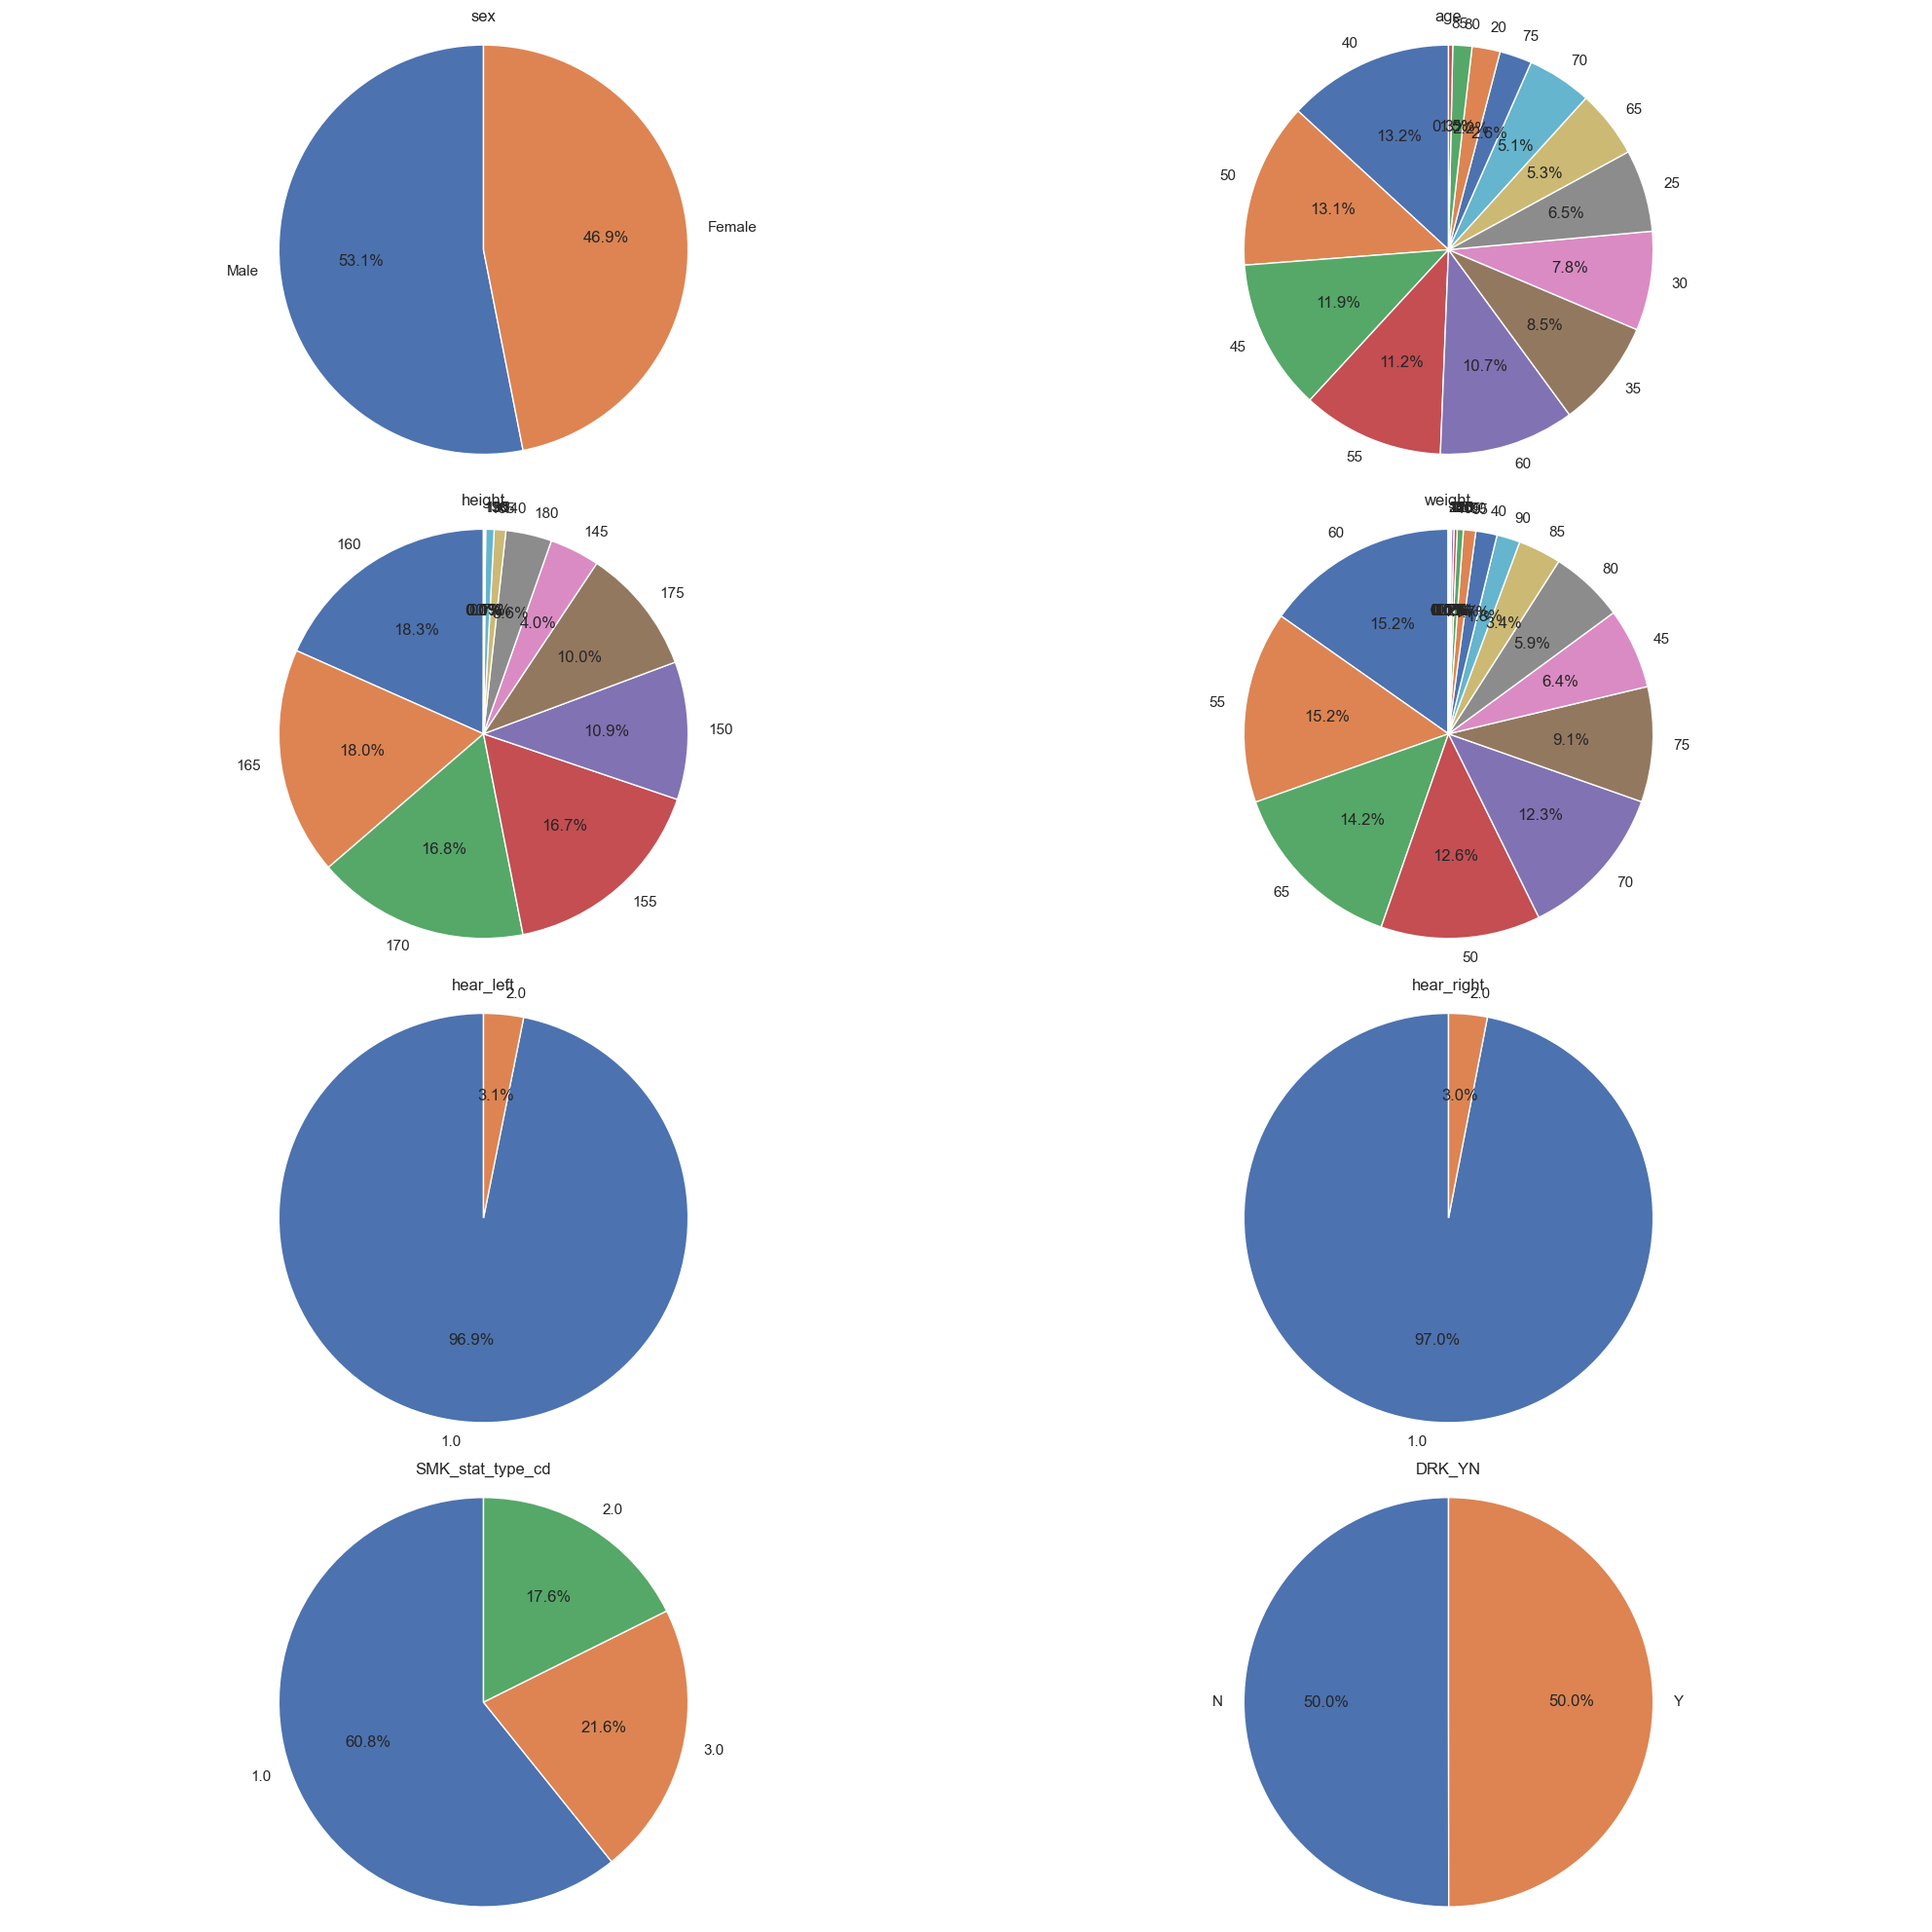

In [11]:
import matplotlib.pyplot as plt

features = ['sex', 'age', 'height', 'weight',
            'hear_left', 'hear_right',
            'SMK_stat_type_cd', 'DRK_YN']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Count unique values
    value_counts = df[feature].value_counts()

    # Plot pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(feature)
    axes[i].axis('equal')  

plt.tight_layout()
plt.show()


Here, The target feature for this paricular problem is 'DNK_YN'. This feature has two possible values 'Yes'(Person drinks) or 'No'(person doesn't drink). Both the possible values are evenly distribited which is good for training and testing.

### **Heatmap :**

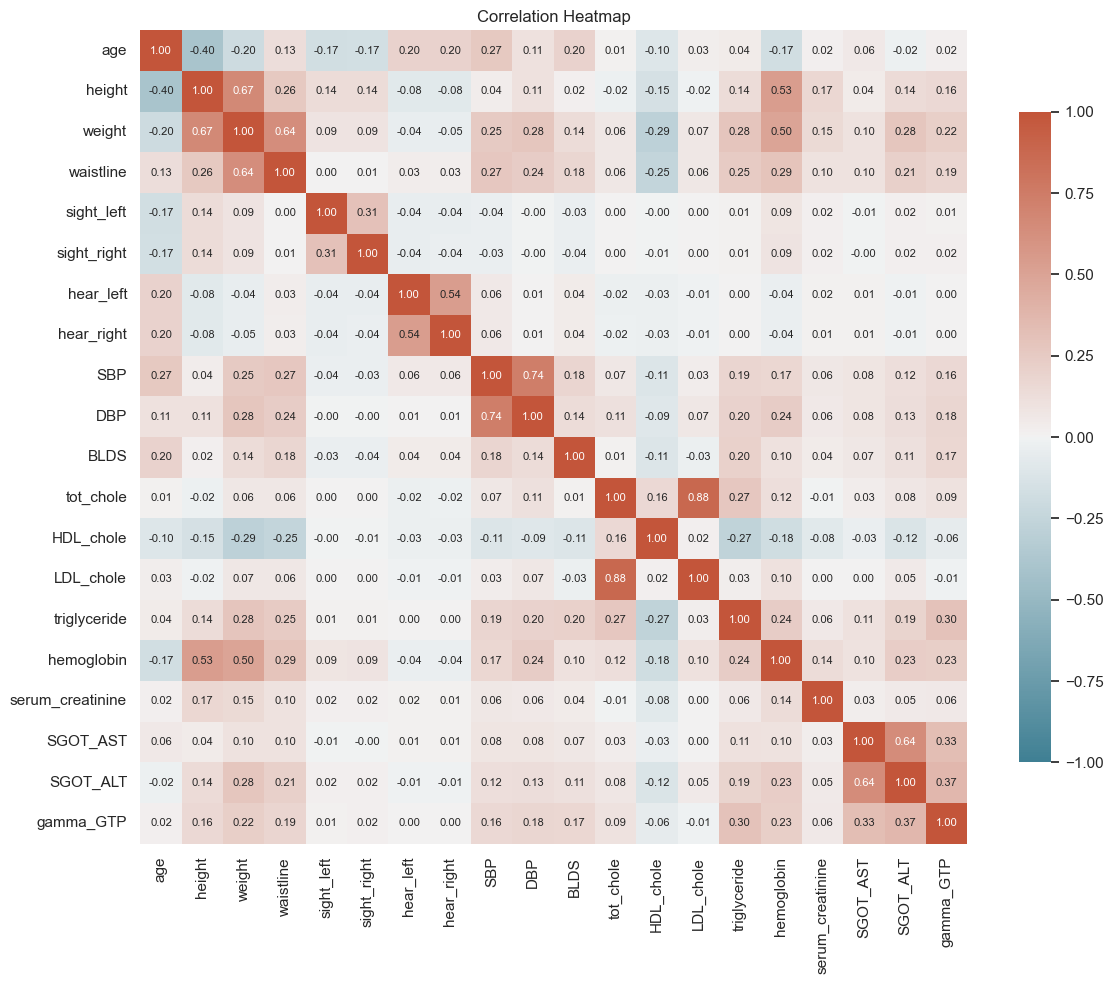

In [12]:
df_numeric = df.drop(['sex', 'DRK_YN', 'SMK_stat_type_cd', 'urine_protein'], axis=1)  
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

I have dropped the four categorical columns since heatmap shows the correlation between numerical columns.  

<Axes: xlabel='DRK_YN', ylabel='count'>

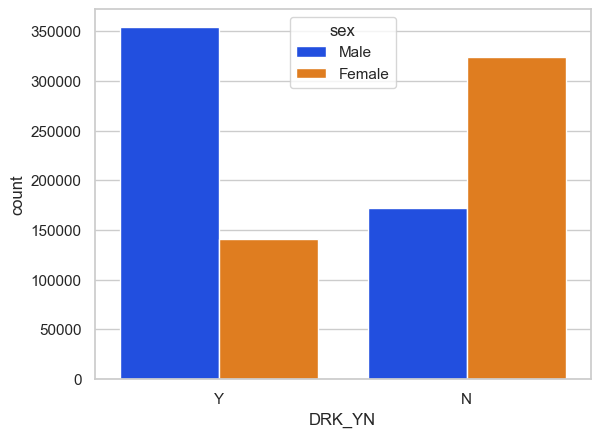

In [13]:
sns.countplot(data = df, x='DRK_YN',hue='sex',palette='bright')

This countplot gives the overall idea of alcoholic persons in terms of the gender of the person. This plot shows that the count of male drinkers is more than the count of female drinkers.

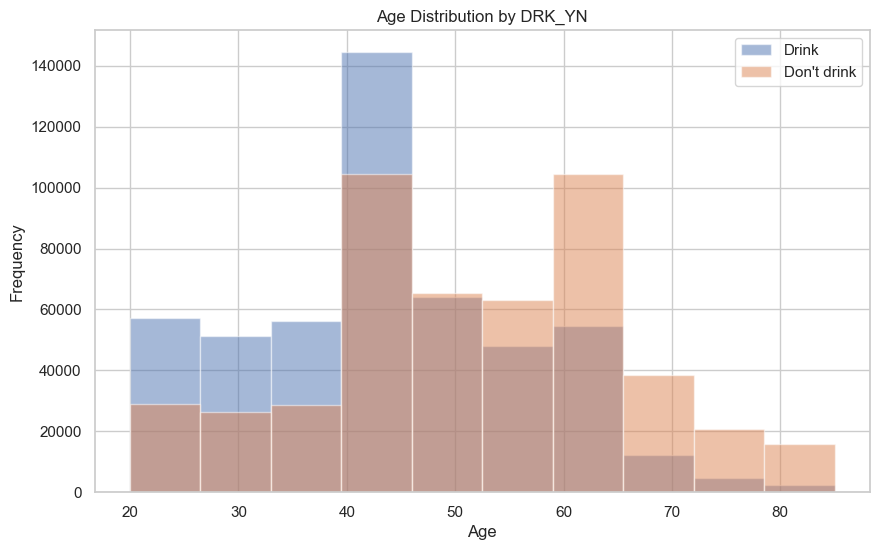

In [14]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 'Y']
drk_2 = df[df['DRK_YN'] == 'N']


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=10, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=10, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

The plot illustrates the relationship between drinking habits and age, revealing that the number of drinkers surpasses non-drinkers within the age range of 20 to 50. This observation suggests that a significant portion of young people have a drinking habit, mirroring real-world trends.

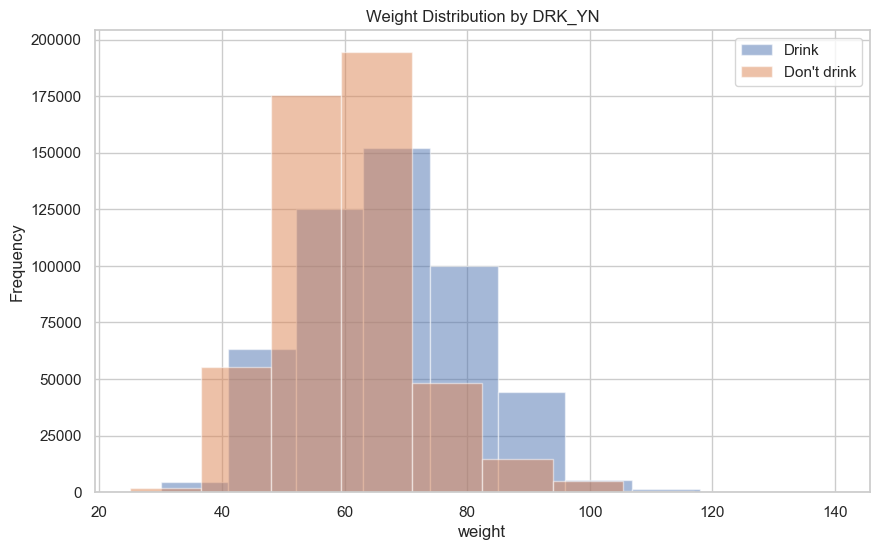

In [15]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 'Y']
drk_2 = df[df['DRK_YN'] == 'N']


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['weight'], bins=10, alpha=0.5, label='Drink')
plt.hist(drk_2['weight'], bins=10, alpha=0.5, label="Don't drink")

plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution by DRK_YN')
plt.legend()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

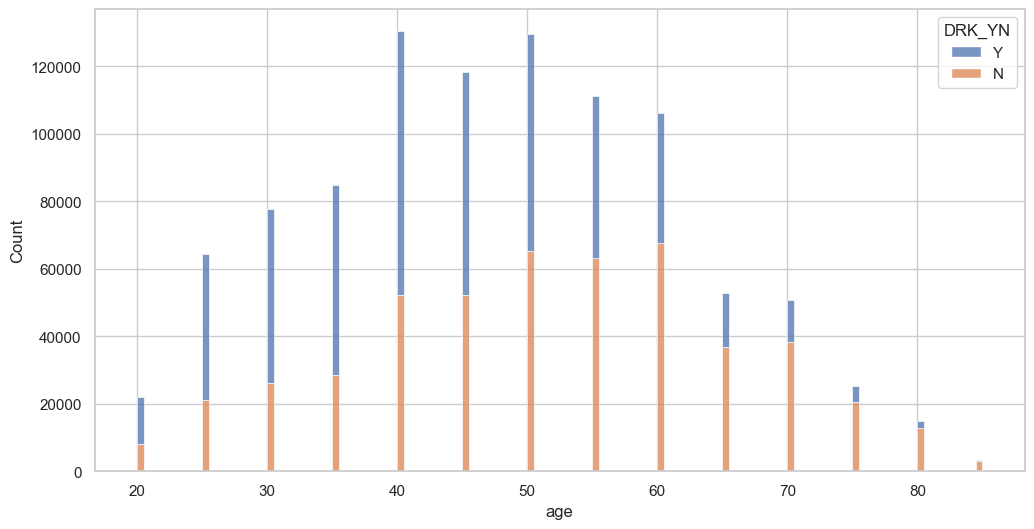

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',hue='DRK_YN',multiple='stack')

This again peroves the observation of age and drinking habit which is mentioned above. 

<Axes: xlabel='DRK_YN', ylabel='weight'>

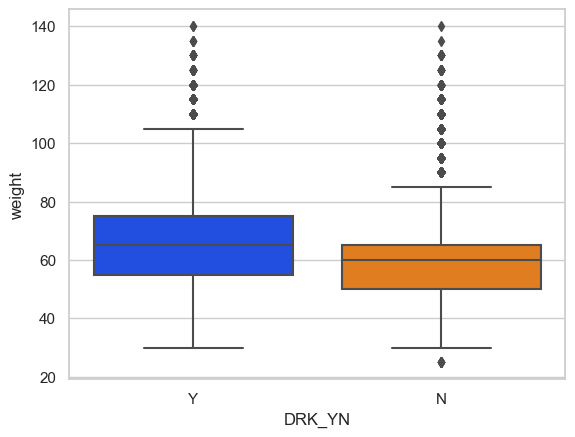

In [17]:
sns.boxplot(x='DRK_YN',y='weight',data=df,palette = 'bright')

### **Histgrams :**

C:\Users\Ishita\AppData\Local\Temp\ipykernel_10460\2253868910.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\Ishita\AppData\Local\Temp\ipykernel_10460\2253868910.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\Ishita\AppData\

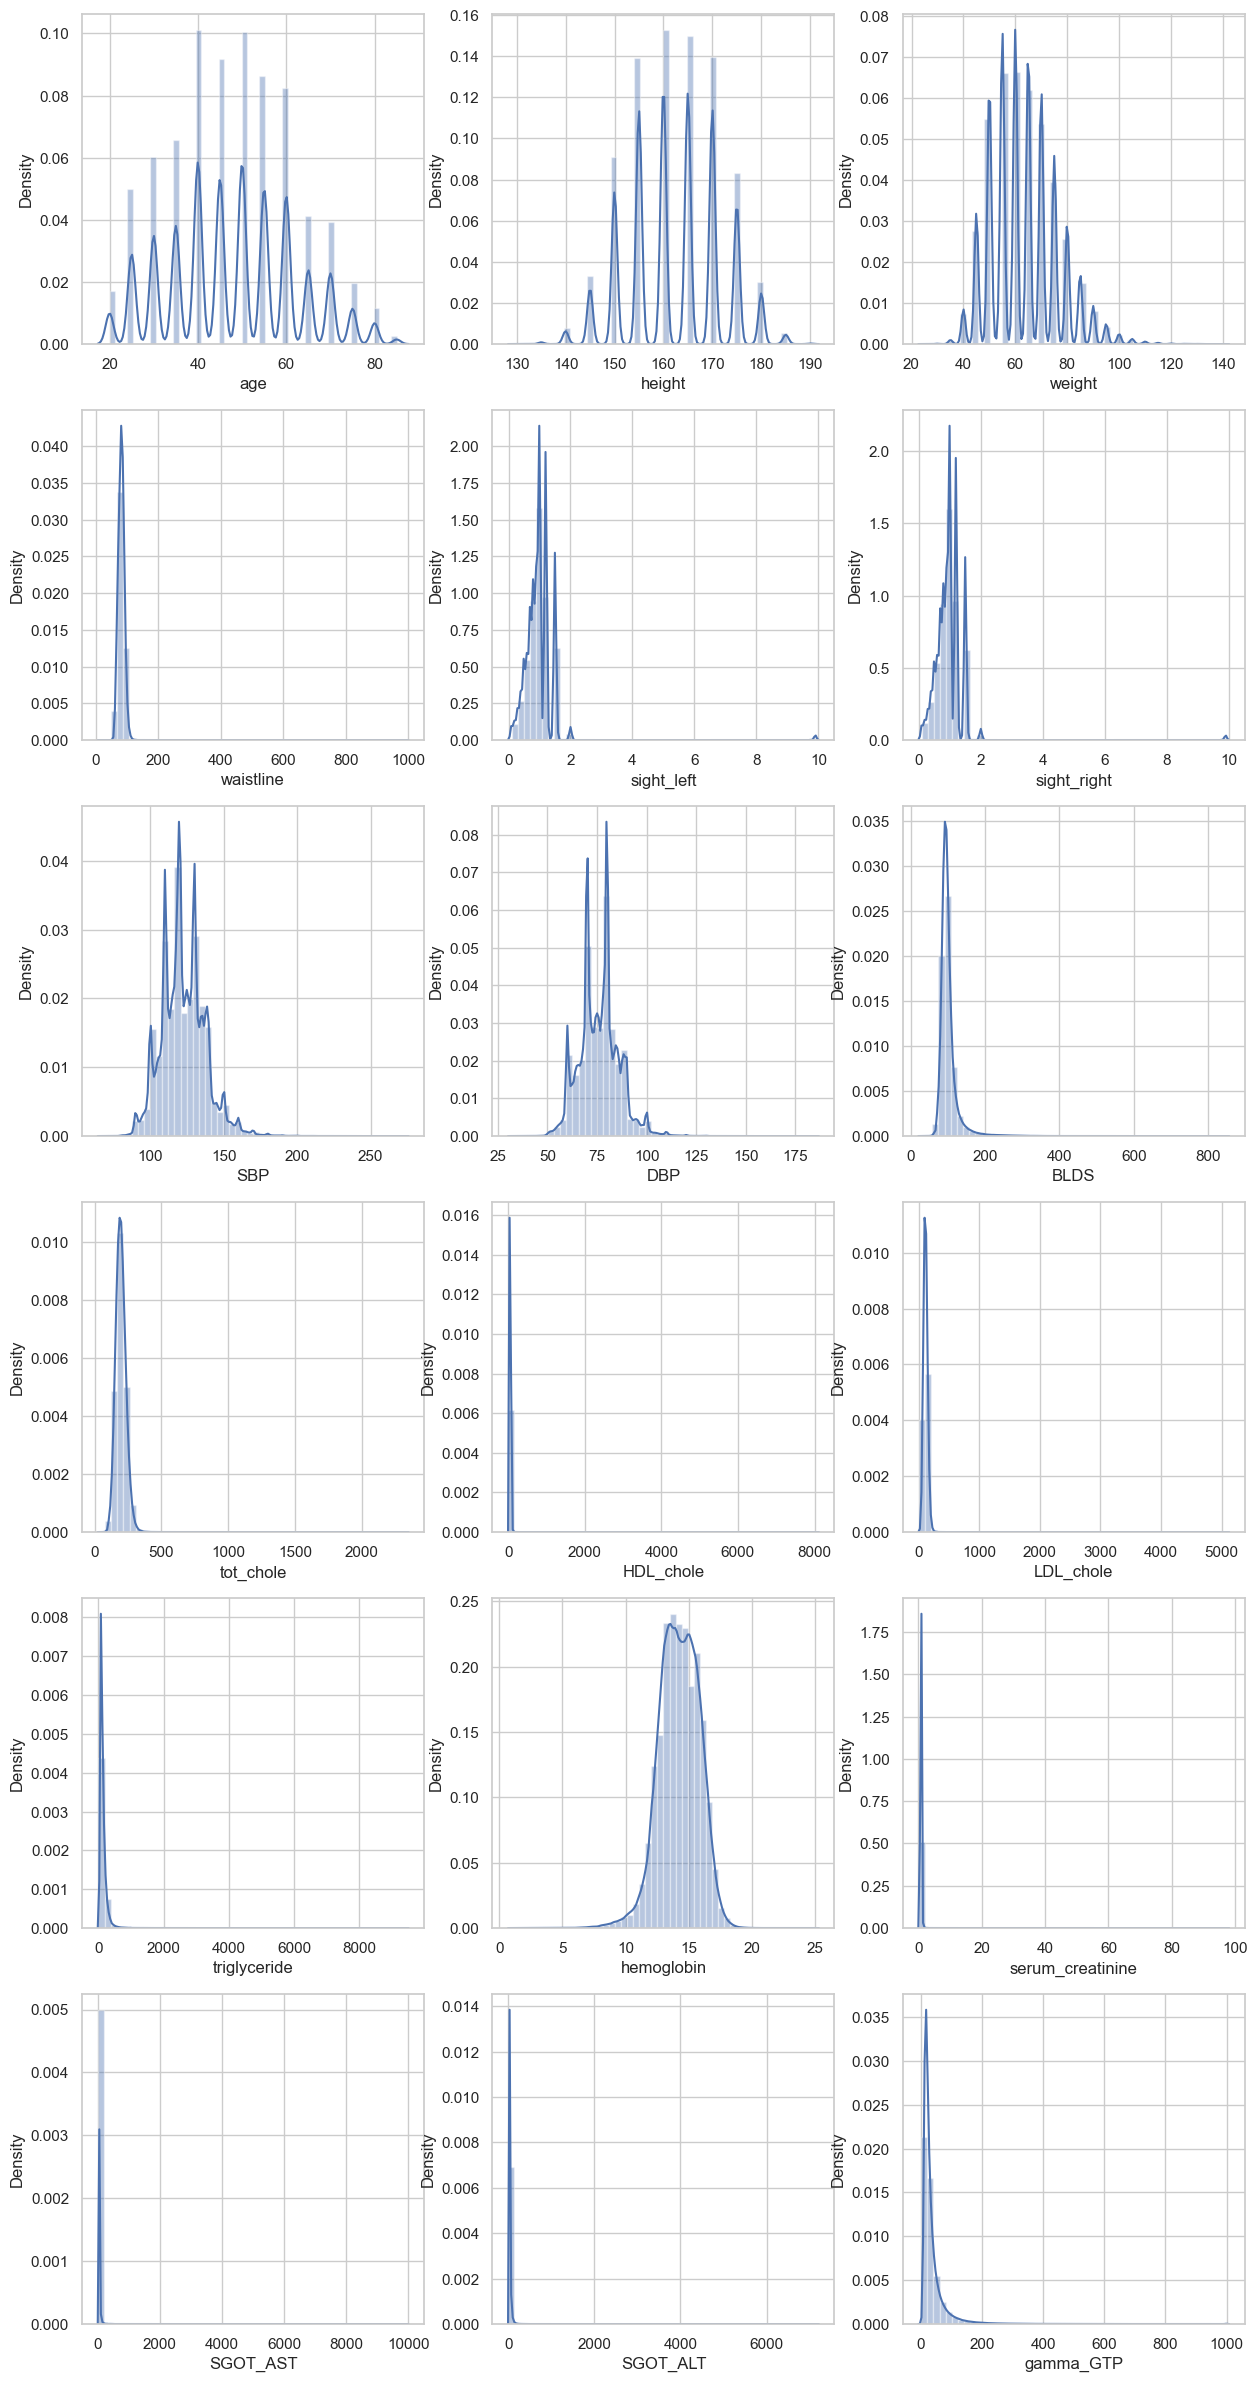

In [18]:
# Plotting histgram for each numerical columns to get a better idea about the distribution of the numeric data
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col


Above histgrams shows the density of each numerical feature. Most of the features are evenly distribited such as age, height, weight, hemoglobin, Tot_chole, SBP, DBP etc. Some features looks skewed also.\
So next, I calculated the skewness of each numerical feature.

In [19]:
print('Skewness for each numerical column')
for col in numeric_columns:
    print(col+' : '+str(df[col].skew()))

Skewness for each numerical column
age : 0.1536533871360202
height : -0.022737170425321796
weight : 0.5765565985058512
waistline : 26.78843978031659
sight_left : 9.994625971918909
sight_right : 10.033647020337831
SBP : 0.48206031829566537
DBP : 0.4000337997282636
BLDS : 4.6173774594196955
tot_chole : 1.5568817248099913
HDL_chole : 104.57763509143004
LDL_chole : 5.2517393773591285
triglyceride : 6.529372850852242
hemoglobin : -0.3839878001506678
serum_creatinine : 111.02205804336974
SGOT_AST : 150.49168971442893
SGOT_ALT : 50.038872293452705
gamma_GTP : 7.718509301560342


### **Scatter Plots:**

C:\Users\Ishita\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Ishita\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


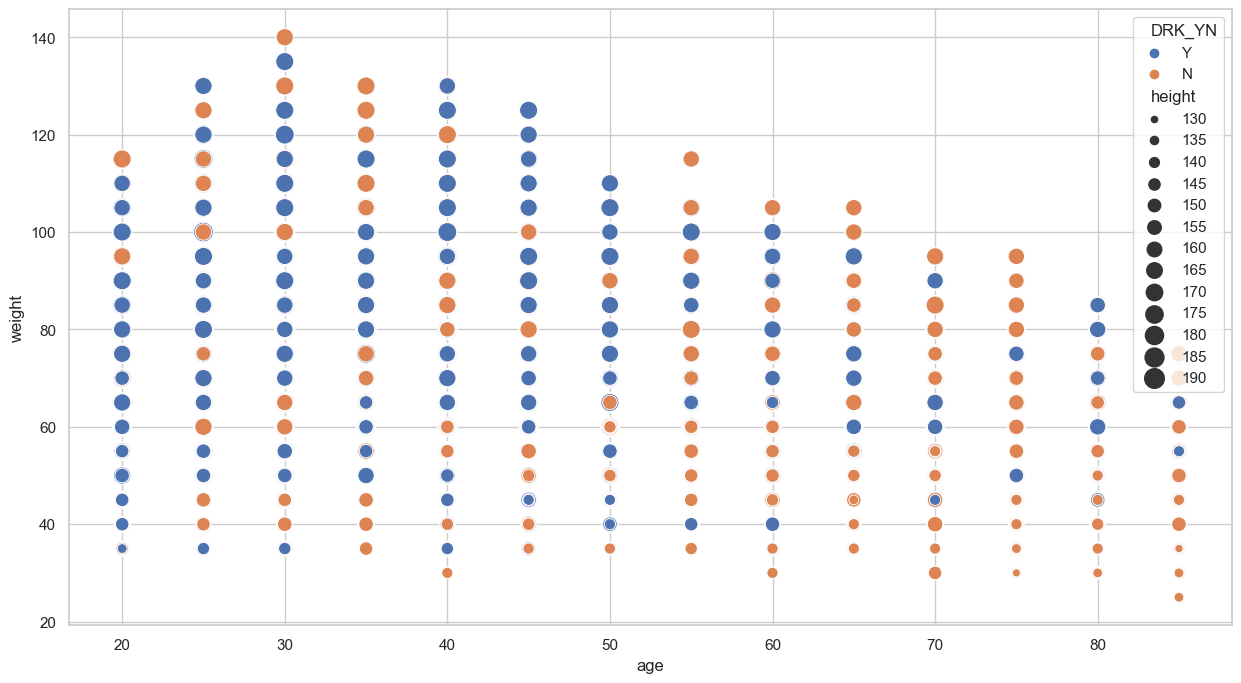

In [20]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["age"], y=df["weight"], hue=df["DRK_YN"], size=df["height"], sizes=(20, 200), legend="full")

In [21]:
# plt.figure(figsize=(15,8))
# ax = sns.scatterplot(x=df["hemoglobin"], y=df["triglyceride"], hue=df["DRK_YN"], size=df["age"], sizes=(20, 200), legend="full")

The scatter plot clearly highlights a important fact: persons who consume alcohol tend to have higher levels of Triglyceride. This observation is evident from the graph, indicating a direct correlation between alcohol consumption and increased Triglyceride levels.

In [22]:
# plt.figure(figsize=(15,8))
# ax = sns.scatterplot(x=df["triglyceride"], y=df["age"], hue=df["DRK_YN"],  legend="full")

**NULL values in Dataset:** 

In [23]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

There are no NULL values in the dataset.

In [24]:
df.shape

(991346, 24)

In [25]:
numeric_columns

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP']

**Outliers Removal :**

In [26]:
def remove_outliers_iqr(dataframe, columns, lower_bound_factor=1.5, upper_bound_factor=1.5):

    trimmed_dataframe = dataframe.copy()

    for column in columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - lower_bound_factor * IQR
        upper_bound = Q3 + upper_bound_factor * IQR

        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

In [27]:
columns_to_remove_outliers = numeric_columns
df_new = remove_outliers_iqr(df, columns_to_remove_outliers)

In [28]:
df_new.shape

(631060, 24)

This is the new dimension of the dataset after removing outliers from each numerical columns.

**Data Transformation :**

In [29]:
from sklearn import preprocessing

In [30]:
le = preprocessing.LabelEncoder()

In [31]:
categorical_columns = ['sex','DRK_YN']
mapping = {}

# Apply LabelEncoder to each column
for column in categorical_columns:
    df_new[column] = le.fit_transform(df_new[column]) + 1 #to start the mapping from 1 
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_) + 1))

In [32]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()

Mapping for column "sex":
Female: 1
Male: 2

Mapping for column "DRK_YN":
N: 1
Y: 2



In [33]:
df_new.head(100)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,2,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,2
1,2,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1
3,2,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1
4,2,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1
5,2,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,45,155,55,72.0,0.9,0.9,1.0,1.0,112.0,67.0,88.0,161.0,54.0,86.0,101.0,13.1,1.0,0.9,15.0,9.0,13.0,1.0,2
141,1,40,160,50,68.0,0.8,0.9,1.0,1.0,100.0,63.0,76.0,186.0,83.0,92.0,50.0,12.0,1.0,0.9,15.0,13.0,14.0,1.0,2
142,1,40,165,60,83.0,1.2,1.0,1.0,1.0,126.0,73.0,101.0,154.0,49.0,92.0,65.0,11.5,1.0,0.7,28.0,25.0,30.0,1.0,2
143,2,45,170,60,81.0,1.0,1.0,1.0,1.0,122.0,75.0,95.0,189.0,41.0,119.0,142.0,10.5,1.0,1.1,21.0,15.0,21.0,1.0,1


In [34]:
df_new.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

**Model Training and Testing**
---

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
# Features and target variable
features = ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 
            'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 
            'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 
            'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
target = 'DRK_YN'

# Split data into features and target variable
X = df_new[features]
y = df_new[target]
y = y-1

# Applying StandardScaler to scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((504848, 23), (126212, 23))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [41]:
# from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# import pandas as pd
# import numpy as np

# # Define models and hyperparameters
# model_dict = {
#     'Logistic Regression': {"model": LogisticRegression(), "params": {'C': [0.1, 1]}},
#     'Random Forest': {"model": RandomForestClassifier(random_state=42), "params": {'n_estimators': [5,10], 'max_depth': [None, 3]}},
#     'XGBoost': {"model": XGBClassifier(random_state=42), "params": {'n_estimators': [5,10], 'learning_rate': [0.01, 0.1]}},
#     'Neural Network': {"model": Sequential([
#                             Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#                             Dense(64, activation='relu'),
#                             Dense(1, activation='sigmoid')
#                         ]), "params": {}},
# }

# best_model = None
# best_accuracy = 0
# best_hyperparameters = {}

# results = []

# for model_name, model_info in model_dict.items():
#     print(f"Evaluating {model_name}...")

#     if model_name == 'Neural Network':
#         model_info['model'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#         model_info['model'].fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
#         y_test_pred = (model_info['model'].predict(X_test_scaled) > 0.5).astype("int32").flatten()
#     else:
#         classifier = GridSearchCV(model_info['model'], model_info['params'], n_jobs=-1, verbose=0)
#         classifier.fit(X_train, y_train)
#         best_model = classifier.best_estimator_
#         y_test_pred = best_model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_test_pred)
#     roc_auc = roc_auc_score(y_test, y_test_pred)
#     f1 = f1_score(y_test, y_test_pred)
#     precision = precision_score(y_test, y_test_pred)
#     recall = recall_score(y_test, y_test_pred)
#     confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
#     classification_rep = classification_report(y_test, y_test_pred, output_dict=True)

#     # Convert confusion matrix to string for DataFrame assignment
#     confusion_matrix_str = np.array2string(confusion_matrix_result)

#     results.append({
#         "Model": model_name,
#         "Accuracy": accuracy,
#         "ROC AUC": roc_auc,
#         "F1 Score": f1,
#         "Precision": precision,
#         "Recall": recall,
#         "Confusion Matrix": confusion_matrix_str,
#     })

#     # Check if current model has better accuracy than previous best
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = model_name
#         best_hyperparameters = classifier.best_params_

# print("Best model:", best_model)
# print(pd.DataFrame(results))


In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Define models and hyperparameters
model_dict = {
    'Logistic Regression': {"model": LogisticRegression(), "params": {'C': [0.1, 1]}},
    'Random Forest': {"model": RandomForestClassifier(random_state=42), "params": {'n_estimators': [5, 10], 'max_depth': [None, 3]}},
    'XGBoost': {"model": XGBClassifier(random_state=42), "params": {'n_estimators': [5, 10], 'learning_rate': [0.01, 0.1]}},
    'Neural Network': {"model": Sequential([
                            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                            Dense(64, activation='relu'),
                            Dense(1, activation='sigmoid')
                        ]), "params": {}},
}

best_model = None
best_accuracy = 0

results = []

for model_name, model_info in model_dict.items():
    print(f"Evaluating {model_name}...")

    if model_name == 'Neural Network':
        model_info['model'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model_info['model'].fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
        y_train_pred = (model_info['model'].predict(X_train_scaled) > 0.5).astype("int32").flatten()
        y_test_pred = (model_info['model'].predict(X_test_scaled) > 0.5).astype("int32").flatten()
    else:
        classifier = GridSearchCV(model_info['model'], model_info['params'], n_jobs=-1, verbose=0)
        classifier.fit(X_train, y_train)
        best_model = classifier.best_estimator_
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Convert confusion matrices to strings for DataFrame assignment
    confusion_matrix_str_train = np.array2string(confusion_matrix_train)
    confusion_matrix_str_test = np.array2string(confusion_matrix_test)

    results.append({
        "Model": model_name,
        "Train Accuracy": accuracy_train,
        "Test Accuracy": accuracy_test,
        "Train F1 Score": f1_train,
        "Test F1 Score": f1_test,
        "Train Precision": precision_train,
        "Test Precision": precision_test,
        "Train Recall": recall_train,
        "Test Recall": recall_test,
        "Train Confusion Matrix": confusion_matrix_str_train,
        "Test Confusion Matrix": confusion_matrix_str_test,
    })

    # Check if the current model has better accuracy than the previous best
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model_name

print("Best model:", best_model)
print(pd.DataFrame(results))


Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating Neural Network...
3945/3945 [==============================] - 12s 3ms/step
Best model: Neural Network
                 Model  Train Accuracy  Test Accuracy  Train F1 Score  \
0  Logistic Regression        0.712628       0.712935        0.669303   
1        Random Forest        0.984746       0.684697        0.982978   
2              XGBoost        0.711650       0.709378        0.668677   
3       Neural Network        0.722402       0.721342        0.685342   

   Test F1 Score  Train Precision  Test Precision  Train Recall  Test Recall  \
0       0.669964         0.699484        0.701005      0.641619     0.641556   
1       0.620186         0.994454        0.684649      0.971764     0.566818   
2       0.666339         0.697684        0.696153      0.641986     0.638974   
3       0.685178         0.704720        0.703607      0.667002     0.667690   

                Train Confusion Mat